gen = ImageDataGenerator()
 
Automatically generates data in batches

Data augmentation (shifting, rotation, flipping, …)

Preprocessing (via preprocess_input)

generator = gen.flow_from_directory()

Specify target image size (e.g. resize all images to be 224 x 224), batch size

model.fit_generator(generator)

Used in place of model.fit(X, Y)


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [15]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('archive_unizpped')  # Replace with the path where you want to extract the files


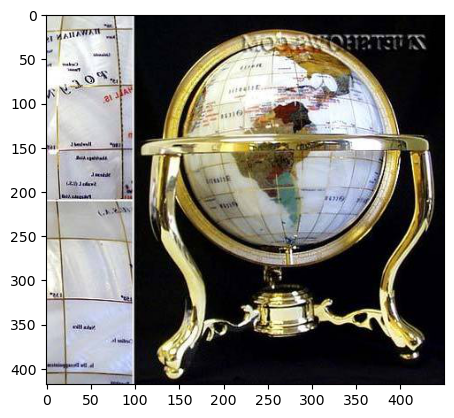

In [22]:
plt.imshow(image.load_img('archive_unizpped/training/non_food/888.jpg'))
plt.show()

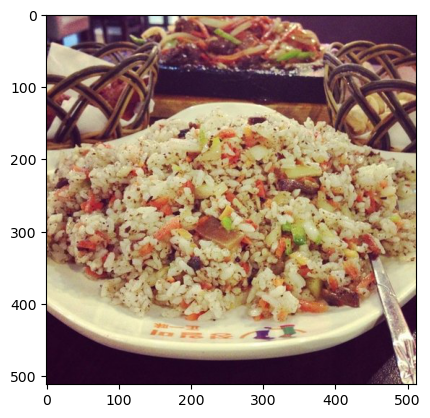

In [26]:
plt.imshow(image.load_img('archive_unizpped/training/food/915.jpg'))
plt.show()

In [79]:
train_path = 'archive_unizpped/training'
valid_path = 'archive_unizpped/validation'


In [80]:
IMAGE_SIZE = [200,200]

In [81]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [82]:
folders = glob(train_path+ '/*')
folders

['archive_unizpped/training\\food', 'archive_unizpped/training\\non_food']

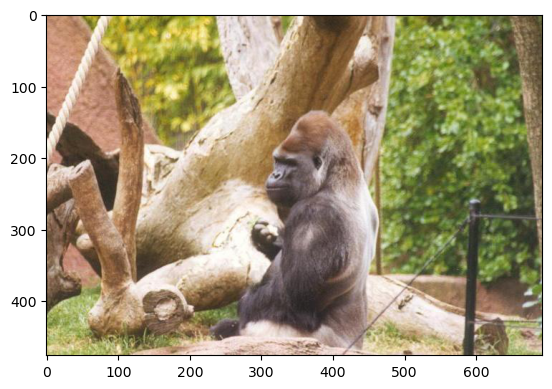

In [83]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [84]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False,
)

In [85]:
ptm.trainable = False

In [86]:
K = len(folders)
x = Flatten()(ptm.output)
x = Dense(K, activation ='softmax')(x)

In [87]:
model = Model(inputs =ptm.input, outputs =x)

In [88]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │          36,866 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [89]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True, 

    preprocessing_function=preprocess_input
)

In [104]:
batch_size = 128

# Create generator for training data
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,  
    batch_size=batch_size
)
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size =IMAGE_SIZE,
    batch_size =batch_size,
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [99]:
model.compile(
    loss='categorical_crossentropy',
    optimizer ='adam',
    metrics=['accuracy'],
)

In [103]:
r = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch = len(image_files) // batch_size,
    validation_steps = len(valid_image_files) // batch_size,

)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.9902 - loss: 0.2824 - val_accuracy: 0.9754 - val_loss: 1.1712
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.9922 - loss: 0.2246 - val_accuracy: 0.9808 - val_loss: 0.0480
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.9929 - loss: 0.1483 - val_accuracy: 0.9665 - val_loss: 1.4194
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.9844 - loss: 0.1955 - val_accuracy: 0.9712 - val_loss: 0.5644
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.9931 - loss: 0.1371 - val_accuracy: 0.9688 - val_loss: 1.0377
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.9922 - loss: 0.1084 - val_accuracy: 0.9712 - val_loss: 1.6783
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.9900 - loss: 0.2630 - val_accuracy: 0.9766 - val_loss: 1.1236
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.

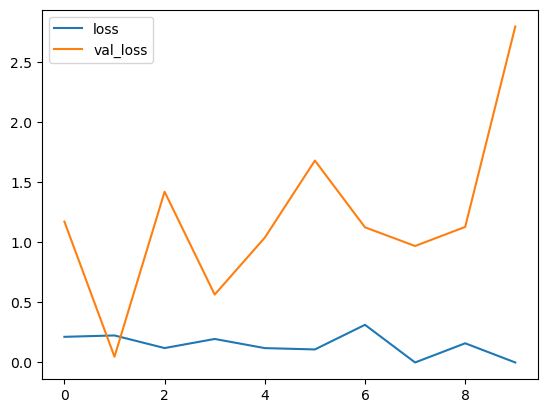

In [105]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

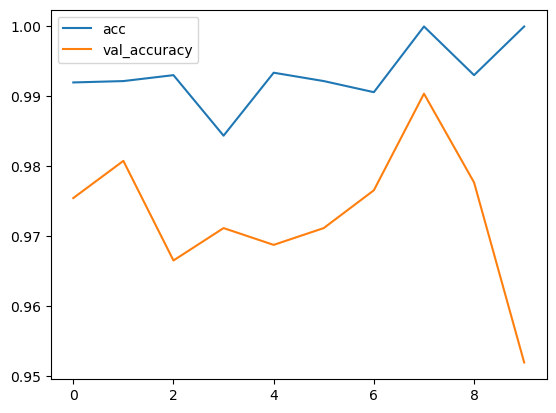

In [106]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()